In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

The below dataset contain  150 different sectors and over 1700 + stocks SYMBOL and respective NSE CODE.

In [2]:
data1 = pd.read_csv("C:\\Users\\Rohit Mhatre\\Downloads\\UPDATED SECTOR 2mar.csv")
data1.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data1 = data1.copy()
print(data1.shape)
data1.head()

(1754, 3)


,SYMBOL,Sector,NSE CODE
0,GRINDWELL:NS,ABRASIVES,"NSE:GRINDWELL,"
1,CARBORUNIV:NS,ABRASIVES,"NSE:CARBORUNIV,"
2,WENDT:NS,ABRASIVES,"NSE:WENDT,"
3,BBTC:NS,AGRICULTURE,"NSE:BBTC,"
4,BSHSL:NS,AGRICULTURE,"NSE:BSHSL,"


In [4]:
data1.drop_duplicates('SYMBOL',inplace=True)

In [5]:
data1['SYMBOL'] = data1['SYMBOL'].str.replace(':','.')
data1.set_index(data1['SYMBOL'],inplace=True)
data1.drop('SYMBOL',axis=1,inplace=True)

In [6]:
data1['Current'] = np.nan

Below is the Live date we needed to fetch the closing price of stocks and Nifty 50 Index. Note- (This date is provided by skateholder)

In [7]:
dates = ["2025-03-18"]

Here we try to fetch the closing price of all the stocks on the given particular date . NOTE- All the dates are working trading dates according to NSE.

In [8]:
for sym in data1.index:
    try:
        stock = yf.Ticker(sym)
        hist = stock.history(period='7d',interval = '1d')
        
        for date,week in zip(dates,['Current']):
            if date in hist.index:
                data1.loc[sym, week] = np.ceil(hist.loc[date]['Close'] * 100) / 100
    except Exception as e:
        print(f"Fetching Error for ticker {sym} : {e}")

$LGBFORGE.NS: possibly delisted; no price data found  (period=7d)
$IDFC.NS: possibly delisted; no price data found  (period=7d)
$IIFLSEC.NS: possibly delisted; no price data found  (period=7d) (Yahoo error = "No data found, symbol may be delisted")
$AKZOINDIA.NS: possibly delisted; no price data found  (period=7d)
$TV18BRDCST.NS: possibly delisted; no price data found  (period=7d)
$BIRLATYRE.NS: possibly delisted; no price data found  (period=7d)


In [67]:
fetch_df = joblib.load('stock.pkl')
fetch_df.head()

,Sector,NSE CODE,base,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
SYMBOL,,,,,,,,,,,,
GRINDWELL.NS,ABRASIVES,"NSE:GRINDWELL,",2400.15,1880.16,1777.25,1939.20,2028.50,2164.56,2031.31,2191.15,2466.90,2400.15
CARBORUNIV.NS,ABRASIVES,"NSE:CARBORUNIV,",1497.41,1104.01,1151.94,1301.81,1313.29,1385.18,1407.15,1427.07,1506.00,1497.41
WENDT.NS,ABRASIVES,"NSE:WENDT,",14569.89,11780.75,12607.71,16375.59,16274.08,15841.86,15272.61,16176.31,15468.90,14569.89
BBTC.NS,AGRICULTURE,"NSE:BBTC,",2839.29,2125.67,2089.07,2218.88,2176.12,2327.67,2477.14,2753.04,2650.49,2839.29
BSHSL.NS,AGRICULTURE,"NSE:BSHSL,",179.03,165.59,151.43,150.28,150.31,165.00,141.14,163.86,171.93,179.03


In [137]:
df1 = data1.copy()
df1.head()

,Sector,NSE CODE,Current
SYMBOL,,,
GRINDWELL.NS,ABRASIVES,"NSE:GRINDWELL,",1608.20
CARBORUNIV.NS,ABRASIVES,"NSE:CARBORUNIV,",986.30
WENDT.NS,ABRASIVES,"NSE:WENDT,",9453.00
BBTC.NS,AGRICULTURE,"NSE:BBTC,",1691.95
BSHSL.NS,AGRICULTURE,"NSE:BSHSL,",126.74


In [138]:
merge_df = fetch_df.merge(df1,how='inner',on='SYMBOL').drop(columns=['Sector_y','NSE CODE_y'],axis=1)
df = merge_df[['Sector_x','NSE CODE_x','base','Current','Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7','Week 8','Week 9']]
df.rename(columns = {'Sector_x':'Sector','NSE CODE_x':'NSE CODE'},inplace=True)

In [139]:
df.head()

,Sector,NSE CODE,base,Current,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
SYMBOL,,,,,,,,,,,,,
GRINDWELL.NS,ABRASIVES,"NSE:GRINDWELL,",2400.15,1608.20,1880.16,1777.25,1939.20,2028.50,2164.56,2031.31,2191.15,2466.90,2400.15
CARBORUNIV.NS,ABRASIVES,"NSE:CARBORUNIV,",1497.41,986.30,1104.01,1151.94,1301.81,1313.29,1385.18,1407.15,1427.07,1506.00,1497.41
WENDT.NS,ABRASIVES,"NSE:WENDT,",14569.89,9453.00,11780.75,12607.71,16375.59,16274.08,15841.86,15272.61,16176.31,15468.90,14569.89
BBTC.NS,AGRICULTURE,"NSE:BBTC,",2839.29,1691.95,2125.67,2089.07,2218.88,2176.12,2327.67,2477.14,2753.04,2650.49,2839.29
BSHSL.NS,AGRICULTURE,"NSE:BSHSL,",179.03,126.74,165.59,151.43,150.28,150.31,165.00,141.14,163.86,171.93,179.03


In [140]:
df[df.isna().any(axis=1)].shape

(103, 13)

In [141]:
df.dropna(axis=0,inplace=True)

In [142]:
df.isnull().sum()

Sector      0
NSE CODE    0
base        0
Current     0
Week 1      0
Week 2      0
Week 3      0
Week 4      0
Week 5      0
Week 6      0
Week 7      0
Week 8      0
Week 9      0
dtype: int64

In [143]:
df.shape

(1653, 13)

In [144]:
df["Live"] = np.ceil(((df['Current'] - df['base']) / df['base']) * 100)

In [145]:
for i in range(1,10):
    df[f"Live {i}"] = np.ceil(((df[f'Week {i}'] - df['base']) / df['base']) * 100)

In [146]:
data = df[['Sector', 'NSE CODE','Live',
       'Live 1', 'Live 2', 'Live 3', 'Live 4', 'Live 5', 'Live 6', 'Live 7',
       'Live 8', 'Live 9']].copy()

In [147]:
data.head()

,Sector,NSE CODE,Live,Live 1,Live 2,Live 3,Live 4,Live 5,Live 6,Live 7,Live 8,Live 9
SYMBOL,,,,,,,,,,,,
GRINDWELL.NS,ABRASIVES,"NSE:GRINDWELL,",-32.0,-21.0,-25.0,-19.0,-15.0,-9.0,-15.0,-8.0,3.0,0.0
CARBORUNIV.NS,ABRASIVES,"NSE:CARBORUNIV,",-34.0,-26.0,-23.0,-13.0,-12.0,-7.0,-6.0,-4.0,1.0,0.0
WENDT.NS,ABRASIVES,"NSE:WENDT,",-35.0,-19.0,-13.0,13.0,12.0,9.0,5.0,12.0,7.0,0.0
BBTC.NS,AGRICULTURE,"NSE:BBTC,",-40.0,-25.0,-26.0,-21.0,-23.0,-18.0,-12.0,-3.0,-6.0,0.0
BSHSL.NS,AGRICULTURE,"NSE:BSHSL,",-29.0,-7.0,-15.0,-16.0,-16.0,-7.0,-21.0,-8.0,-3.0,0.0


In [148]:
nifty_df = pd.DataFrame(columns=['Symbol'])
nifty_df['Current'] = np.nan
nifty_df.set_index('Symbol',inplace=True)

Symbol = '^NSEI'
stock = yf.Ticker(Symbol)
hist = stock.history(period='1y')

for date,week in zip(dates,['Current']):
    if date in hist.index:
        nifty_df.loc[Symbol,week] = np.ceil(hist.loc[date]['Close'] * 100) / 100

In [149]:
nifty_fetch = joblib.load('Nifty.pkl')

In [150]:
nifty_fetch.head()

,base,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
Symbol,,,,,,,,,,
^NSEI,26178.95,23696.31,22829.16,24188.66,23587.5,24708.41,23349.91,24199.35,25057.35,26178.95


In [151]:
nifty_df = nifty_df.merge(nifty_fetch,how='inner',on='Symbol')[['base','Current','Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7','Week 8','Week 9']].copy()

In [152]:
nifty_df

,base,Current,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9
Symbol,,,,,,,,,,,
^NSEI,26178.95,22834.31,23696.31,22829.16,24188.66,23587.5,24708.41,23349.91,24199.35,25057.35,26178.95


In [153]:
nifty_df["Live"] = round(((nifty_df['Current'] - nifty_df['base']) / nifty_df['base']) * 100,2)
for i in range(1,10):
    nifty_df[f"Live {i}"] = round(((nifty_df[f'Week {i}'] - nifty_df['base']) / nifty_df['base']) * 100,2)

In [154]:
nifty_df

,base,Current,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,...,Live,Live 1,Live 2,Live 3,Live 4,Live 5,Live 6,Live 7,Live 8,Live 9
Symbol,,,,,,,,,,,,,,,,,,,,,
^NSEI,26178.95,22834.31,23696.31,22829.16,24188.66,23587.5,24708.41,23349.91,24199.35,25057.35,...,-12.78,-9.48,-12.8,-7.6,-9.9,-5.62,-10.81,-7.56,-4.28,0.0


In [155]:
values = nifty_df.loc['^NSEI','Live':]
print(values)

Live     -12.78
Live 1    -9.48
Live 2   -12.80
Live 3    -7.60
Live 4    -9.90
Live 5    -5.62
Live 6   -10.81
Live 7    -7.56
Live 8    -4.28
Live 9     0.00
Name: ^NSEI, dtype: float64


Adding the Nifty pct change values in every stock as per the every Live weeks

In [156]:
columns = ['Live',
       'Live 1', 'Live 2', 'Live 3', 'Live 4', 'Live 5', 'Live 6', 'Live 7',
       'Live 8', 'Live 9']
for col,val in zip(columns,values):
    data[col] = data[col] + val

In [157]:
data.head(10)

,Sector,NSE CODE,Live,Live 1,Live 2,Live 3,Live 4,Live 5,Live 6,Live 7,Live 8,Live 9
SYMBOL,,,,,,,,,,,,
GRINDWELL.NS,ABRASIVES,"NSE:GRINDWELL,",-44.78,-30.48,-37.8,-26.6,-24.9,-14.62,-25.81,-15.56,-1.28,0.0
CARBORUNIV.NS,ABRASIVES,"NSE:CARBORUNIV,",-46.78,-35.48,-35.8,-20.6,-21.9,-12.62,-16.81,-11.56,-3.28,0.0
WENDT.NS,ABRASIVES,"NSE:WENDT,",-47.78,-28.48,-25.8,5.4,2.1,3.38,-5.81,4.44,2.72,0.0
BBTC.NS,AGRICULTURE,"NSE:BBTC,",-52.78,-34.48,-38.8,-28.6,-32.9,-23.62,-22.81,-10.56,-10.28,0.0
BSHSL.NS,AGRICULTURE,"NSE:BSHSL,",-41.78,-16.48,-27.8,-23.6,-25.9,-12.62,-31.81,-15.56,-7.28,0.0
KSCL.NS,AGRICULTURE,"NSE:KSCL,",0.22,-17.48,-24.8,-21.6,-23.9,-10.62,-29.81,-14.56,-15.28,0.0
VENKEYS.NS,AGRICULTURE,"NSE:VENKEYS,",-33.78,-17.48,-30.8,-14.6,-19.9,-14.62,-24.81,-19.56,-8.28,0.0
OSWALSEEDS.NS,AGRICULTURE,"NSE:OSWALSEEDS,",-55.78,-38.48,-41.8,-26.6,-27.9,-18.62,-29.81,-12.56,-4.28,0.0
MGEL.NS,AGRICULTURE,"NSE:MGEL,",3.22,6.52,-14.8,10.4,-11.9,-10.62,-22.81,-8.56,2.72,0.0


In [158]:
group_sec = data.groupby('Sector')[['Live','Live 1','Live 2','Live 3','Live 4','Live 5','Live 6','Live 7','Live 8','Live 9']].mean()
group_sec = group_sec.sort_values(by='Live',ascending=False)
group_sec.reset_index(inplace=True)
group_sec.index = group_sec.index + 1
top_live = group_sec.head(15)

In [159]:
top_live

,Sector,Live,Live 1,Live 2,Live 3,Live 4,Live 5,Live 6,Live 7,Live 8,Live 9
1,Textile - Weaving,-3.155000,9.395000,9.700000,25.775000,19.725000,13.755000,-7.810000,-3.435000,-7.405000,0.0
2,NBFCFinance Large Cap,-6.780000,-7.813333,-20.800000,-10.933333,-21.566667,-14.953333,-24.810000,-17.560000,-8.613333,0.0
3,Hospital & Healthcare Services-Healthcare G2,-11.380000,0.120000,-11.400000,7.600000,4.600000,11.280000,-3.210000,-2.760000,-1.280000,0.0
4,Hospital & Healthcare Services-Healthcare G1,-12.080000,-3.780000,-13.000000,1.700000,-2.800000,3.280000,-7.910000,-3.160000,-1.280000,0.0
5,Watches & Accessories-CONSUMER DURABLES,-12.780000,-30.480000,-35.800000,-6.600000,-7.900000,-8.620000,-20.810000,-17.560000,-8.280000,0.0
6,Air Conditioners-CONSUMER DURABLES,-13.980000,-8.080000,-13.000000,13.800000,-6.900000,-4.620000,-10.610000,-1.160000,0.520000,0.0
7,Pharmaceuticals & Drugs-Healthcare G5,-14.380000,0.320000,-15.700000,-0.800000,-6.000000,2.380000,-10.610000,-4.560000,-4.080000,0.0
8,Bank - PrivateBank - PrivateBANKINGLarge Cap,-14.780000,-14.230000,-22.050000,-10.850000,-14.900000,-6.370000,-16.060000,-11.560000,-7.530000,0.0
9,"Hotel, Resort & Restaurants-Hospitality G3",-15.280000,-1.105000,-10.050000,10.900000,0.475000,1.380000,-13.685000,-3.935000,-2.780000,0.0
10,"Hotel, Resort & Restaurants-Hospitality G2",-15.880000,-8.680000,-22.500000,-2.800000,-10.300000,-4.820000,-18.610000,-10.460000,-3.980000,0.0


In [160]:
top_30_sec = group_sec.head(30)

In [161]:
fig = px.bar(data_frame=top_live,
            x = top_30_sec['Sector'],
            y = top_30_sec['Live'],
            color=top_30_sec.index,
            width=1200,
            height=1000)
fig.update_layout(
    xaxis_title='Sectors',
    yaxis_title='Live',
    xaxis_tickangle=90
)
fig

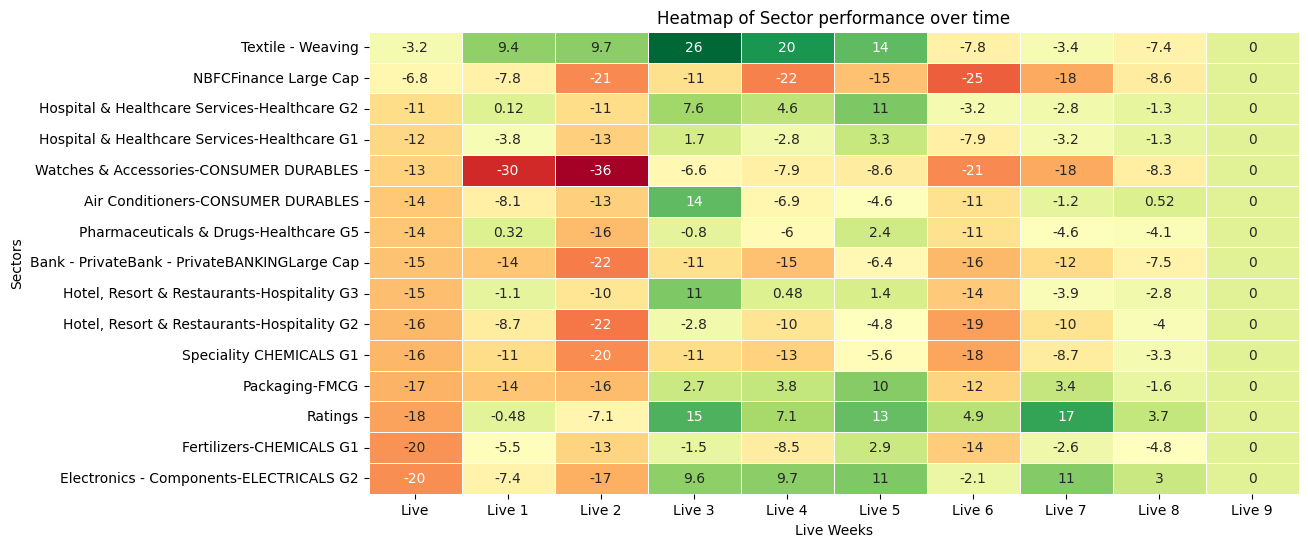

In [162]:
weekly_df = top_live.set_index('Sector').iloc[:,:]
weekly_df.sort_values(by = 'Live',ascending=False)

plt.figure(figsize=(12,6))
sns.heatmap(weekly_df,cmap="RdYlGn",annot=True,cbar=False,linewidth=0.5)
plt.title("Heatmap of Sector performance over time")
plt.xlabel('Live Weeks')
plt.ylabel('Sectors')
plt.show()

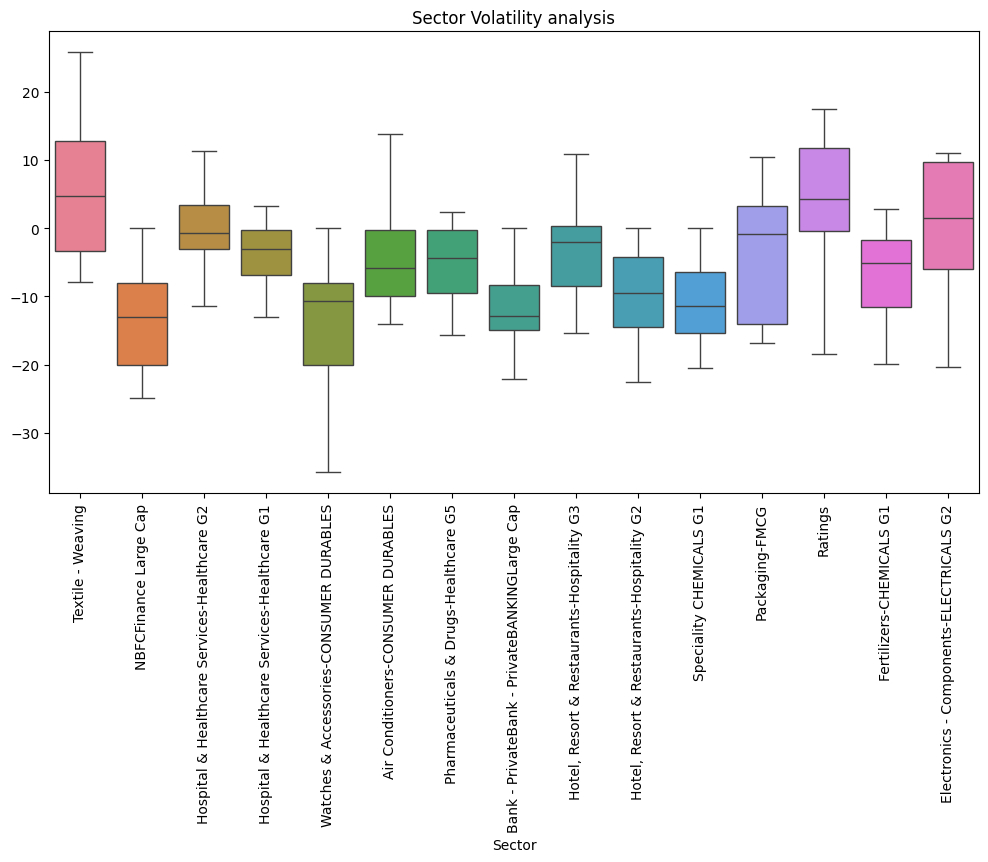

In [163]:
plt.figure(figsize=(12,6))
sns.boxplot(weekly_df.T)
plt.xticks(rotation=90)
plt.title('Sector Volatility analysis')
plt.show()

In [164]:
columns = ['Live', 'Live 1', 'Live 2', 'Live 3', 'Live 4', 'Live 5',
       'Live 6', 'Live 7', 'Live 8', 'Live 9']
grid_df = top_live.copy()
for col in columns:
    grid_df[col] = grid_df[col].rank(method='dense',ascending=False).astype(int)

In [165]:
styled_df = grid_df.style
for col in columns:
    styled_df = styled_df.background_gradient(cmap='RdYlGn_r',subset=[col])

In [166]:
styled_df

,Sector,Live,Live 1,Live 2,Live 3,Live 4,Live 5,Live 6,Live 7,Live 8,Live 9
1,Textile - Weaving,1,1,1,1,1,1,4,8,12,1
2,NBFCFinance Large Cap,2,9,11,14,15,15,15,14,15,1
3,Hospital & Healthcare Services-Healthcare G2,3,3,4,6,4,3,3,6,5,1
4,Hospital & Healthcare Services-Healthcare G1,4,6,6,8,7,6,5,7,4,1
5,Watches & Accessories-CONSUMER DURABLES,5,15,14,12,10,14,14,14,14,1
6,Air Conditioners-CONSUMER DURABLES,6,10,6,3,9,10,7,4,3,1
7,Pharmaceuticals & Drugs-Healthcare G5,7,2,7,9,8,8,6,10,10,1
8,Bank - PrivateBank - PrivateBANKINGLarge Cap,8,13,12,13,14,13,11,13,13,1
9,"Hotel, Resort & Restaurants-Hospitality G3",9,5,3,4,6,9,10,9,7,1
10,"Hotel, Resort & Restaurants-Hospitality G2",10,11,13,11,12,11,13,12,9,1


In [167]:
def improved_sector(data):
    condition = (grid_df['Live 1'] - grid_df['Live'] >= 2) | (grid_df['Live 2'] - grid_df['Live'] >= 2)
    return data.loc[condition,['Sector','Live','Live 1','Live 2']]

improved = improved_sector(grid_df)
improved_sec = improved['Sector']
print(improved_sec)

2                            NBFCFinance Large Cap
4     Hospital & Healthcare Services-Healthcare G1
5          Watches & Accessories-CONSUMER DURABLES
6               Air Conditioners-CONSUMER DURABLES
8     Bank - PrivateBank - PrivateBANKINGLarge Cap
10      Hotel, Resort & Restaurants-Hospitality G2
12                                  Packaging-FMCG
Name: Sector, dtype: object


In [168]:
dummy_df = df.copy()
dummy_df.reset_index(inplace=True)

In [169]:
avg_sec = data.groupby('Sector')['Live'].mean()
print("Improved Sectors Stocks:")
print("---------------------------------------------------------")
for imp in improved_sec:
    for sec,avg in avg_sec.items():
        if sec == imp:
            stock = dummy_df[(dummy_df['Sector'] == imp) & (dummy_df['Live'] >= avg)]['NSE CODE']
            print(imp)
            print(''.join(stock))
            print('\n')

Improved Sectors Stocks:
---------------------------------------------------------
NBFCFinance Large Cap
NSE:BAJFINANCE,NSE:CHOLAFIN,NSE:BAJAJHLDNG,


Hospital & Healthcare Services-Healthcare G1
NSE:MAXHEALTH,NSE:FORTIS,NSE:NH,NSE:MEDANTA,NSE:ASTERDM,NSE:KIMS,NSE:RAINBOW,


Watches & Accessories-CONSUMER DURABLES
NSE:KDDL,


Air Conditioners-CONSUMER DURABLES
NSE:BLUESTARCO,NSE:AMBER,NSE:EPACK,


Bank - PrivateBank - PrivateBANKINGLarge Cap
NSE:KOTAKBANK,NSE:HDFCBANK,NSE:ICICIBANK,


Hotel, Resort & Restaurants-Hospitality G2
NSE:EIHAHOTELS,NSE:TAJGVK,NSE:ROHLTD,NSE:KAMATHOTEL,


Packaging-FMCG
NSE:TCPLPACK,




In [170]:
top_15_stocks = []
print("Top 15 Sectors above average stocks:")
print('-------------------------------------------------------------------------')
for sec,avg in top_live[['Sector','Live']].values:
    stocks = data[(data['Sector'] == sec) & (data['Live'] >= avg)]
    stocks_idx = stocks.index.to_list()
    top_15_stocks.append(stocks_idx)
    print(sec)
    print(''.join(stocks['NSE CODE']))
    print('\n')
    

Top 15 Sectors above average stocks:
-------------------------------------------------------------------------
Textile - Weaving
NSE:SIYSIL,NSE:AARVEEDEN,


NBFCFinance Large Cap
NSE:BAJFINANCE,NSE:BAJAJHLDNG,


Hospital & Healthcare Services-Healthcare G2
NSE:HCG,NSE:VIJAYA,NSE:VIMTALABS,


Hospital & Healthcare Services-Healthcare G1
NSE:MAXHEALTH,NSE:FORTIS,NSE:NH,NSE:MEDANTA,NSE:ASTERDM,NSE:KIMS,


Watches & Accessories-CONSUMER DURABLES
NSE:KDDL,


Air Conditioners-CONSUMER DURABLES
NSE:BLUESTARCO,NSE:AMBER,


Pharmaceuticals & Drugs-Healthcare G5
NSE:INNOVACAP,NSE:BLUEJET,NSE:MEDPLUS,NSE:AMIORG,


Bank - PrivateBank - PrivateBANKINGLarge Cap
NSE:KOTAKBANK,NSE:HDFCBANK,NSE:ICICIBANK,


Hotel, Resort & Restaurants-Hospitality G3
NSE:ASIANHOTNR,NSE:RHL,


Hotel, Resort & Restaurants-Hospitality G2
NSE:TAJGVK,NSE:ROHLTD,NSE:KAMATHOTEL,


Speciality CHEMICALS G1
NSE:STYRENIX,NSE:HEUBACHIND,NSE:SRF,NSE:NAVINFLUOR,


Packaging-FMCG
NSE:TCPLPACK,


Ratings
NSE:CRISIL,NSE:CARERATING,


Fe

1. All stocks from top 15 sectors live values.
3. sort descending
4. portfolio optimize.

In [171]:
all_stocks = [stock for stocks in top_15_stocks for stock in stocks]

In [172]:
filterd_df = data[data.index.isin(all_stocks)][['Sector','NSE CODE' ,'Live']]
filterd_df = filterd_df.sort_values(by='Live',ascending=False)
filterd_df.head()

,Sector,NSE CODE,Live
SYMBOL,,,
AARVEEDEN.NS,Textile - Weaving,"NSE:AARVEEDEN,",192.22
VIMTALABS.NS,Hospital & Healthcare Services-Healthcare G2,"NSE:VIMTALABS,",88.22
ASIANHOTNR.NS,"Hotel, Resort & Restaurants-Hospitality G3","NSE:ASIANHOTNR,",82.22
BLUEJET.NS,Pharmaceuticals & Drugs-Healthcare G5,"NSE:BLUEJET,",68.22
KAMATHOTEL.NS,"Hotel, Resort & Restaurants-Hospitality G2","NSE:KAMATHOTEL,",51.22


In [173]:
def portfolio(data,initial_cash,distribution = None , top_ranks = None):
    df = data.copy()
    df['Allocation'] = 0
    
    df.iloc[:top_ranks[0],df.columns.get_loc('Allocation')] = (distribution[0] * initial_cash) // top_ranks[0]
    df.iloc[top_ranks[0]:top_ranks[1],df.columns.get_loc('Allocation')] = (distribution[1] * initial_cash) // top_ranks[1]
    df.iloc[top_ranks[1]:top_ranks[2],df.columns.get_loc('Allocation')] = (distribution[2] * initial_cash // top_ranks[2])

    return df

In [174]:
portfolio(filterd_df,initial_cash = 100000,distribution = [0.5,0.3,0.2],top_ranks = [5,10,15]).head(15)

,Sector,NSE CODE,Live,Allocation
SYMBOL,,,,
AARVEEDEN.NS,Textile - Weaving,"NSE:AARVEEDEN,",192.22,10000
VIMTALABS.NS,Hospital & Healthcare Services-Healthcare G2,"NSE:VIMTALABS,",88.22,10000
ASIANHOTNR.NS,"Hotel, Resort & Restaurants-Hospitality G3","NSE:ASIANHOTNR,",82.22,10000
BLUEJET.NS,Pharmaceuticals & Drugs-Healthcare G5,"NSE:BLUEJET,",68.22,10000
KAMATHOTEL.NS,"Hotel, Resort & Restaurants-Hospitality G2","NSE:KAMATHOTEL,",51.22,10000
TAJGVK.NS,"Hotel, Resort & Restaurants-Hospitality G2","NSE:TAJGVK,",48.22,3000
AMBER.NS,Air Conditioners-CONSUMER DURABLES,"NSE:AMBER,",30.22,3000
MBAPL.NS,Fertilizers-CHEMICALS G1,"NSE:MBAPL,",28.22,3000
NH.NS,Hospital & Healthcare Services-Healthcare G1,"NSE:NH,",22.22,3000


In [175]:
stocks_df = data.sort_values(by = 'Live',ascending=False)
stocks_df.reset_index(inplace=True)
stocks_df.index = stocks_df.index + 1
stocks_top = stocks_df.head(100)

In [176]:
stocks_grid = stocks_top.copy()
for col in stocks_grid.iloc[:,3:].columns:
    stocks_grid[col] = stocks_grid[col].rank(method='dense',ascending=False).astype(int)

In [177]:
stocks_style = stocks_grid.style
for col in stocks_grid.iloc[:,3:].columns:
    stocks_style = stocks_style.background_gradient(cmap='RdYlGn_r',subset=[col])

In [181]:
stocks_style

,SYMBOL,Sector,NSE CODE,Live,Live 1,Live 2,Live 3,Live 4,Live 5,Live 6,Live 7,Live 8,Live 9
1,AARVEEDEN.NS,Textile - Weaving,"NSE:AARVEEDEN,",1,1,1,1,2,4,4,12,24,1
2,VIMTALABS.NS,Hospital & Healthcare Services-Healthcare G2,"NSE:VIMTALABS,",2,11,15,10,8,9,12,29,26,1
3,ASIANHOTNR.NS,"Hotel, Resort & Restaurants-Hospitality G3","NSE:ASIANHOTNR,",3,4,8,11,43,37,33,32,17,1
4,63MOONS.NS,IT - SoftwareInformation Technology G5,"NSE:63MOONS,",4,3,3,2,1,2,3,3,2,1
5,NACLIND.NS,Pesticides & AgrochemicalsCHEMICALS G2,"NSE:NACLIND,",5,36,47,42,47,52,47,35,29,1
6,BLUEJET.NS,Pharmaceuticals & Drugs-Healthcare G5,"NSE:BLUEJET,",6,16,45,48,48,52,37,30,26,1
7,KIRIINDUS.NS,Dyes & Pigments-CHEMICALS,"NSE:KIRIINDUS,",6,5,14,6,4,5,1,11,18,1
8,BAJAJHCARE.NS,Pharmaceuticals & Drugs-Healthcare G8,"NSE:BAJAJHCARE,",7,8,23,18,26,50,38,31,27,1
9,SHAILY.NS,Plastic Products-Plastic Products G3,"NSE:SHAILY,",8,17,27,27,24,32,32,23,32,1
10,CARTRADE.NS,e-Commerce-Information Technology,"NSE:CARTRADE,",9,9,22,15,10,19,17,14,25,1


In [183]:
def improved_stocks(df):
    condition = ((stocks_grid['Live 1'] - stocks_grid['Live'] >= 9) | (stocks_grid['Live 2'] - stocks_grid['Live'] >= 9))
    return df.loc[condition,['SYMBOL','Live','Live 1','Live 2','NSE CODE']]

imp_stocks = improved_stocks(stocks_grid)
print(f"len of stocks: {len(imp_stocks)}")
for stock in imp_stocks['NSE CODE']:
    print(stock)

len of stocks: 42
NSE:VIMTALABS,
NSE:NACLIND,
NSE:BLUEJET,
NSE:BAJAJHCARE,
NSE:SHAILY,
NSE:CARTRADE,
NSE:CAMLINFINE,
NSE:KAMATHOTEL,
NSE:TAJGVK,
NSE:AXISCADES,
NSE:JINDRILL,
NSE:AVANTIFEED,
NSE:ASALCBR,
NSE:PANACEABIO,
NSE:ANUP,
NSE:JASH,
NSE:MPSLTD,
NSE:TARIL,
NSE:NH,
NSE:TCPLPACK,
NSE:PGEL,
NSE:AMIORG,
NSE:DECCANCE,
NSE:SARDAEN,
NSE:ICEMAKE,
NSE:VADILALIND,
NSE:VIJAYA,
NSE:AARTIPHARM,
NSE:STEELCAS,
NSE:REDINGTON,
NSE:SRF,
NSE:NAVINFLUOR,
NSE:MAHASTEEL,
NSE:RAMANEWS,
NSE:MEDANTA,
NSE:GRWRHITECH,
NSE:MGEL,
NSE:MAZDOCK,
NSE:SDBL,
NSE:ROHLTD,
NSE:KSCL,
NSE:BAJFINANCE,


In [186]:
stocks_top['Sector'].value_counts().head(10)

Sector
Speciality CHEMICALS G1                         3
Pharmaceuticals & Drugs-Healthcare G8           3
Hospital & Healthcare Services-Healthcare G2    3
Hotel, Resort & Restaurants-Hospitality G2      3
Textile - Weaving                               2
TextileMid Cap G2                               2
Hospital & Healthcare Services-Healthcare G1    2
Fertilizers-CHEMICALS G1                        2
Steel & Iron ProductsSteel Small Cap G2         2
AGRICULTURE                                     2
Name: count, dtype: int64